In [511]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import zscore,boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [512]:
df = pd.read_csv(r'C:\Users\rjhcl\Desktop\baseball case\baseball.csv')

In [513]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [514]:
df.shape
# there are 30 rows and 17 columns

(30, 17)

In [515]:
df.describe()
# we got the average and many other things for describe

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [516]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [517]:
df.isnull().sum()
# no null values

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

# Exploratory analysis

C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='W', ylabel='count'>

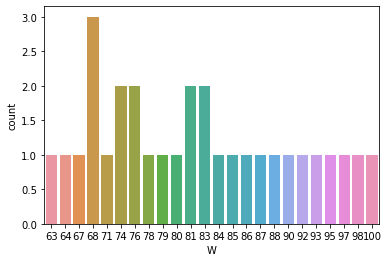

In [518]:
sns.countplot(df['W'])
# the highest number of wins are 100 that occured once

<AxesSubplot:xlabel='W', ylabel='R'>

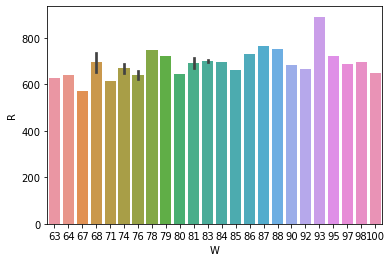

In [519]:
sns.barplot(x='W',y='R',data=df)
# Relationship between W and R observed

<AxesSubplot:xlabel='W', ylabel='AB'>

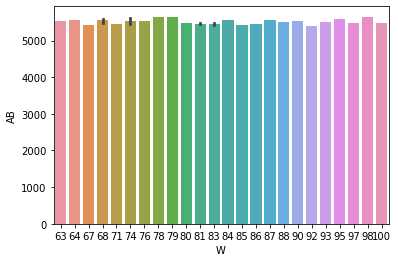

In [520]:
sns.barplot(x='W',y='AB',data=df)
# Relationship between W and AB observed

<AxesSubplot:xlabel='W', ylabel='H'>

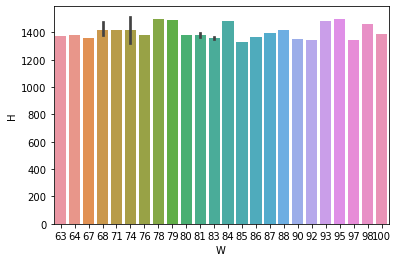

In [521]:
sns.barplot(x='W',y='H',data=df)
# Relationship between W and H observed

<AxesSubplot:xlabel='W', ylabel='2B'>

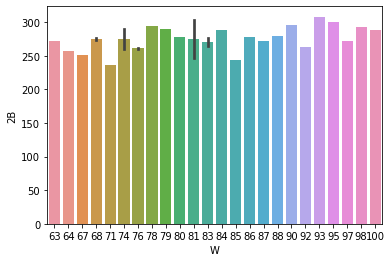

In [522]:
sns.barplot(x='W',y='2B',data=df)
# Relationship between W and 2B observed

<AxesSubplot:xlabel='W', ylabel='3B'>

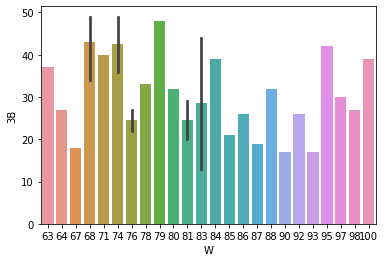

In [523]:
sns.barplot(x='W',y='3B',data=df)
# Relationship between W and 3B observed

<AxesSubplot:xlabel='W', ylabel='HR'>

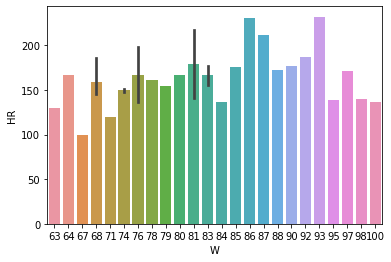

In [524]:
sns.barplot(x='W',y='HR',data=df)
# Relationship between W and HR observed

<AxesSubplot:xlabel='W', ylabel='BB'>

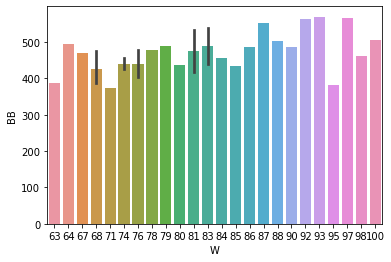

In [525]:
sns.barplot(x='W',y='BB',data=df)
# Relationship between W and BB observed

<AxesSubplot:xlabel='W', ylabel='SO'>

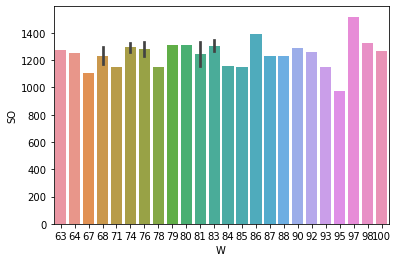

In [526]:
sns.barplot(x='W',y='SO',data=df)
# relationship between W and So observed

<AxesSubplot:>

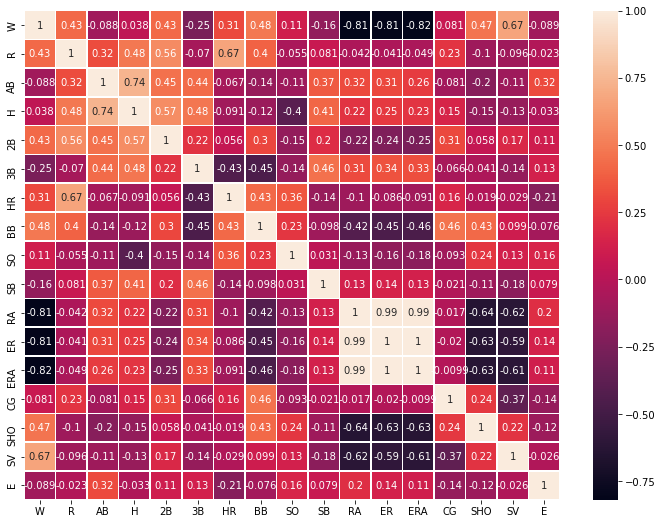

In [527]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),linewidths=0.5,annot=True)
# we can see that RA ,ER,ERA is highly negative correlated with W(target class)

W        AxesSubplot(0.125,0.536818;0.133621x0.343182)
R     AxesSubplot(0.285345,0.536818;0.133621x0.343182)
AB     AxesSubplot(0.44569,0.536818;0.133621x0.343182)
H     AxesSubplot(0.606034,0.536818;0.133621x0.343182)
2B    AxesSubplot(0.766379,0.536818;0.133621x0.343182)
3B          AxesSubplot(0.125,0.125;0.133621x0.343182)
HR       AxesSubplot(0.285345,0.125;0.133621x0.343182)
BB        AxesSubplot(0.44569,0.125;0.133621x0.343182)
SO       AxesSubplot(0.606034,0.125;0.133621x0.343182)
SB       AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

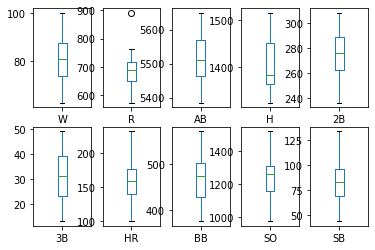

In [528]:
df.iloc[:,0:10].plot(kind='box',subplots=True,layout=(2,5))

RA        AxesSubplot(0.125,0.536818;0.133621x0.343182)
ER     AxesSubplot(0.285345,0.536818;0.133621x0.343182)
ERA     AxesSubplot(0.44569,0.536818;0.133621x0.343182)
CG     AxesSubplot(0.606034,0.536818;0.133621x0.343182)
SHO    AxesSubplot(0.766379,0.536818;0.133621x0.343182)
SV           AxesSubplot(0.125,0.125;0.133621x0.343182)
E         AxesSubplot(0.285345,0.125;0.133621x0.343182)
dtype: object

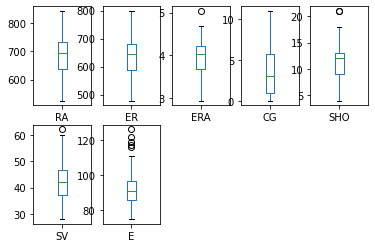

In [529]:
df.iloc[:,10:].plot(kind='box',subplots=True,layout=(2,5))
# we have outliers in R, ERA, SHO, SB, E

<AxesSubplot:>

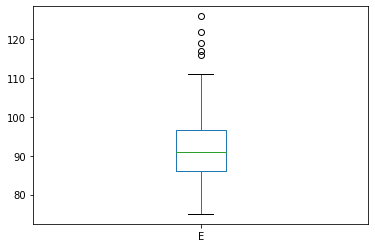

In [530]:
df['E'].plot(kind='box')

In [531]:
# Lets check the skewness
df.skew()
# there is skewness present in R, H, CG, SHO, SV, E

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [532]:
A=np.abs(zscore(df))
A

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [533]:
data = df[(A<3).all(axis=1)]

In [534]:
df.shape

(30, 17)

In [535]:
data.shape

(29, 17)

In [536]:
# removing negatively correlated columns
data.drop(['ERA' , 'ER' , "RA"] , axis=1, inplace = True)

C:\Users\rjhcl\anaconda3\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [537]:
# splitting the data into X and y
X = data.drop(['W'] , axis=1)
y = data['W']

In [538]:
# Spliting X and y into X_train, X_test, y_train, y_test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=23)

In [539]:
# standard scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(X_train)
x_test=sc.fit_transform(X_test)

In [547]:
log=LogisticRegression(random_state=0)
log.fit(X_train,y_train)
pred = log.predict(X_test)
print("r2 score is: ",r2_score(y_test,pred))

r2 score is:  -0.41393243898496856


C:\Users\rjhcl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [548]:
svc_lin=SVC(kernel='linear',random_state=0)
svc_lin.fit(X_train,y_train)
pred = svc_lin.predict(X_test)
print("r2 score is: ",r2_score(y_test,pred))

r2 score is:  0.1512041377080976


In [549]:
svc_rbf=SVC(kernel='rbf',random_state=0)
svc_rbf.fit(X_train,y_train)
pred = svc_rbf.predict(X_test)
print("r2 score is: ",r2_score(y_test,pred))

r2 score is:  -1.0874414094068205


In [550]:
gauss=GaussianNB()
gauss.fit(X_train,y_train)
pred = gauss.predict(X_test)
print("r2 score is: ",r2_score(y_test,pred))

r2 score is:  -1.0874414094068205


In [551]:
tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
tree.fit(X_train,y_train)
pred = tree.predict(X_test)
print("r2 score is: ",r2_score(y_test,pred))

r2 score is:  0.37594957168256027


In [552]:
forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
forest.fit(X_train,y_train)
pred = forest.predict(X_test)
print("r2 score is: ",r2_score(y_test,pred))

r2 score is:  -0.26192015516405354


In [553]:
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print("r2 score is: ",r2_score(y_test,pred))

r2 score is:  -0.851786002909326


In [558]:
# so for our final model we are going to use decision tree
import pickle
#save the model
pickle.dump(tree,open('model.pkl' , 'wb'))